In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

print('# File sizes')
for f in os.listdir('../data/'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../data/' + f) / 1000000, 2)) + 'MB')

# File sizes
clean_kaggle_test.csv         287.81MB
clean_kaggle_train.csv        40.15MB
clean_kaggle_validation.csv   10.03MB
feature_test_v2.csv           0.0MB
feature_train_v2.csv          272.95MB
feature_validation_v2.csv     68.25MB


In [3]:
df_train = pd.read_csv('../data/clean_kaggle_train.csv')
df_train.head()

,clean_q1,clean_q2,is_duplicate
0,what habits should i adopt to have a more purp...,what habits can i adopt or avoid every day to ...,1
1,what does heartbreak feel like?,what does a heartbreak feels like?,1
2,which is the best fixed income fund?,what is the best fixed income fund?,1
3,which are the best apps to read books?,what is the best app for reading books online?,0
4,is hummus high in calorie like bread?,if i get in an accident while renting a car fr...,0


In [39]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

Total number of question pairs for training: 323432
Duplicate pairs: 36.92%


KeyError: 'qid1'

In [31]:
df_test = pd.read_csv('../data/kaggle_competition/clean_kaggle_validation.csv')
df_test.head()

,clean_q1,clean_q2,is_duplicate
0,how can i increase height after 22?,what is the way to increase the height at the ...,1
1,what do you do to get an adrenaline rush?,what is an adrenaline rush?,0
2,which phone should i buy under 15k?,which is the best phone under 15000?,1
3,what will happen if superman punches his own f...,how strong can superman punch?,0
4,what is the difference between front and back ...,what is the difference between front end and b...,1


In [40]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 80858


mean-train 59.80 std-train 31.95 mean-test 59.79 std-test 31.97 max-train 1169.00 max-test 1151.00


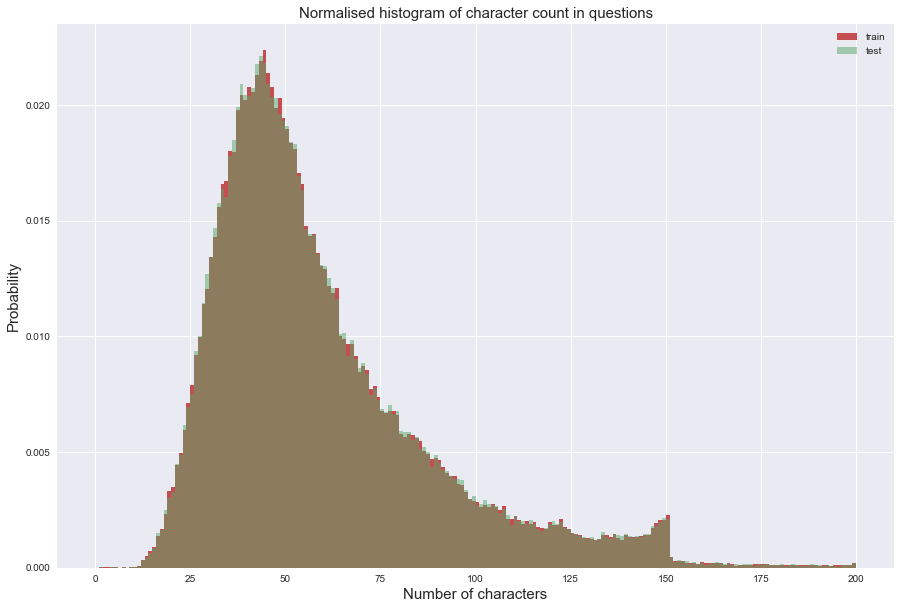

In [41]:
train_qs = pd.Series(df_train['clean_q1'].tolist() + df_train['clean_q2'].tolist()).astype(str)
test_qs = pd.Series(df_test['clean_q1'].tolist() + df_test['clean_q2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 11.07 std-train 5.89 mean-test 11.06 std-test 5.89 max-train 237.00 max-test 237.00


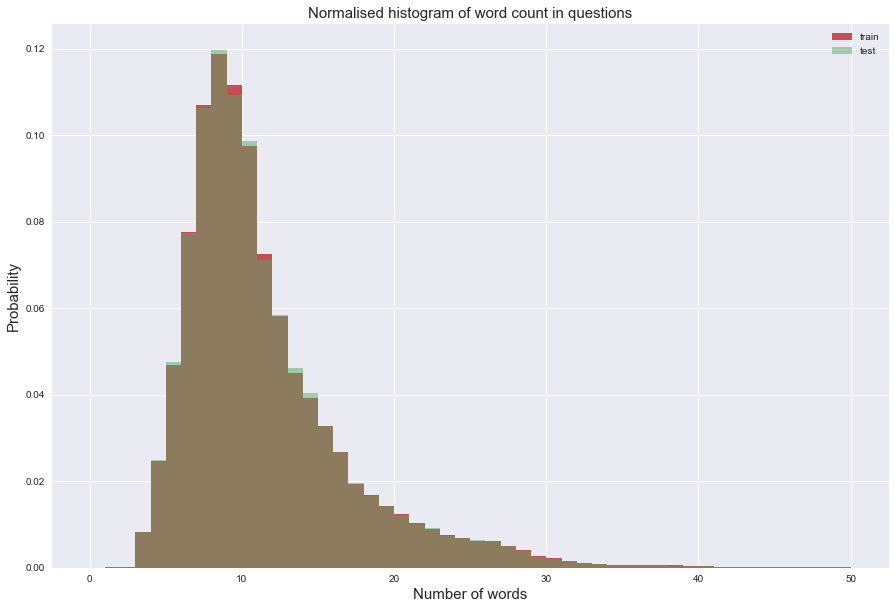

In [42]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

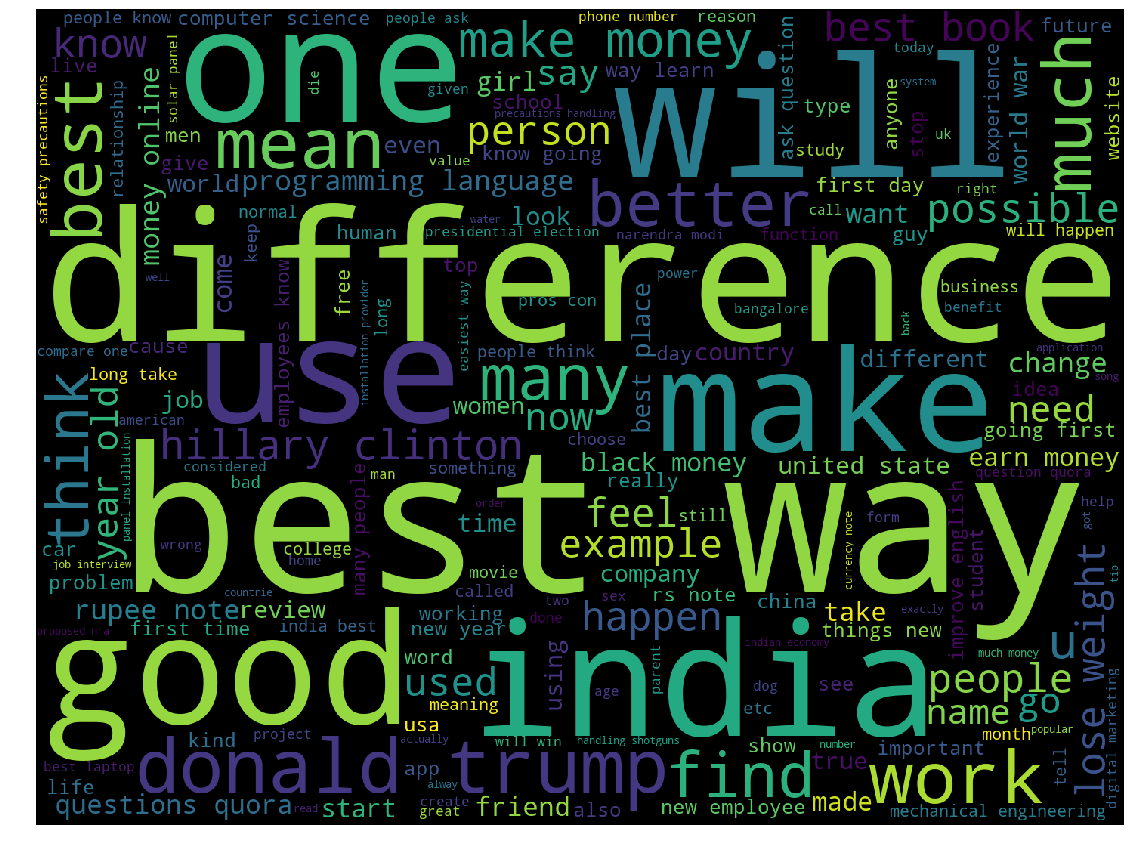

In [9]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

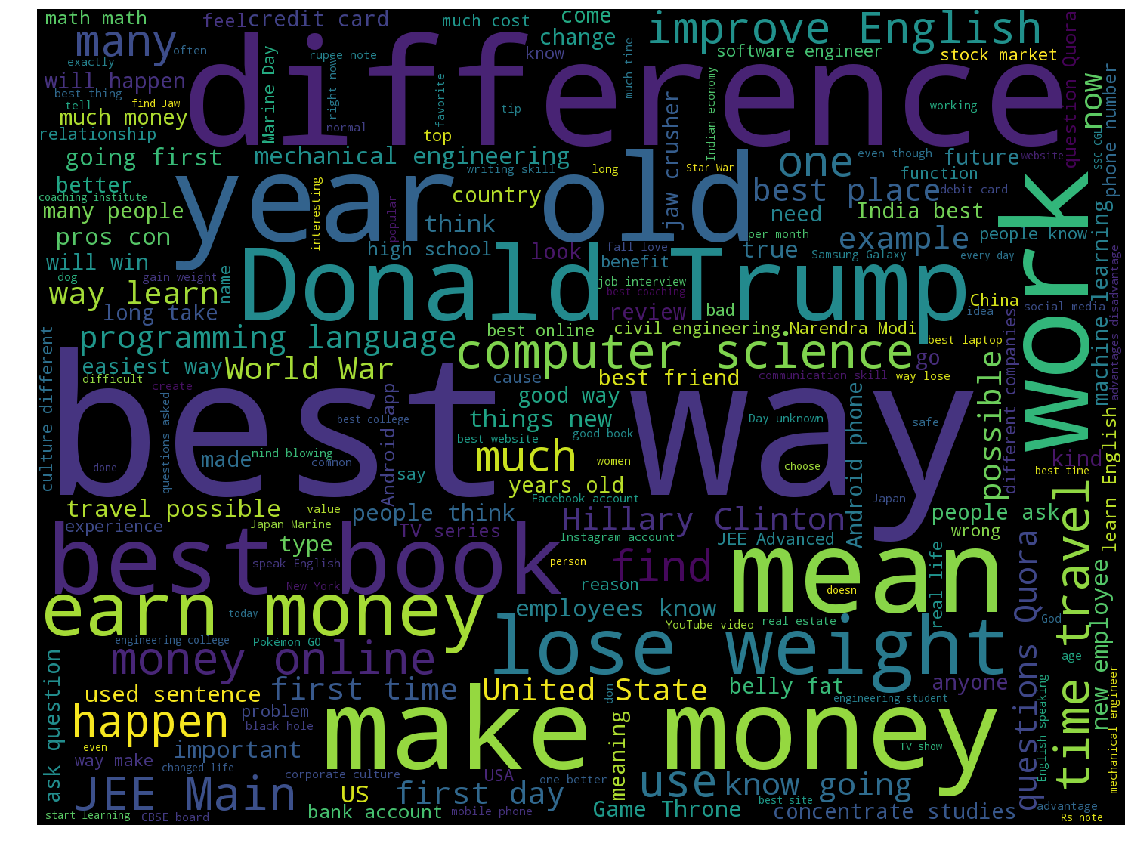

In [14]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(test_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

Semantic Analysis


In [10]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.88%
Questions with [math] tags: 0.12%
Questions with full stops: 6.30%
Questions with capitalised first letters: 0.00%
Questions with capital letters: 0.00%
Questions with numbers: 11.85%


In [27]:

train_word_match=df_train.apply(word_match_share, axis=1, raw=True)
df_train.head(), train_word_match.head()

(                                            clean_q1  \
 0  what habits should i adopt to have a more purp...   
 1                    what does heartbreak feel like?   
 2               which is the best fixed income fund?   
 3             which are the best apps to read books?   
 4              is hummus high in calorie like bread?   
 
                                             clean_q2  is_duplicate  
 0  what habits can i adopt or avoid every day to ...             1  
 1                 what does a heartbreak feels like?             1  
 2                what is the best fixed income fund?             1  
 3     what is the best app for reading books online?             0  
 4  if i get in an accident while renting a car fr...             0  ,
 0    0.461538
 1    0.666667
 2    1.000000
 3    0.222222
 4    0.000000
 dtype: float64)

In [43]:
test_word_match=df_test.apply(word_match_share, axis=1)
df_test.head(), test_word_match.head()

(                                            clean_q1  \
 0                how can i increase height after 22?   
 1          what do you do to get an adrenaline rush?   
 2                which phone should i buy under 15k?   
 3  what will happen if superman punches his own f...   
 4  what is the difference between front and back ...   
 
                                             clean_q2  is_duplicate  
 0  what is the way to increase the height at the ...             1  
 1                        what is an adrenaline rush?             0  
 2               which is the best phone under 15000?             1  
 3                     how strong can superman punch?             0  
 4  what is the difference between front end and b...             1  ,
 0    0.444444
 1    0.800000
 2    0.333333
 3    0.285714
 4    0.666667
 dtype: float64)

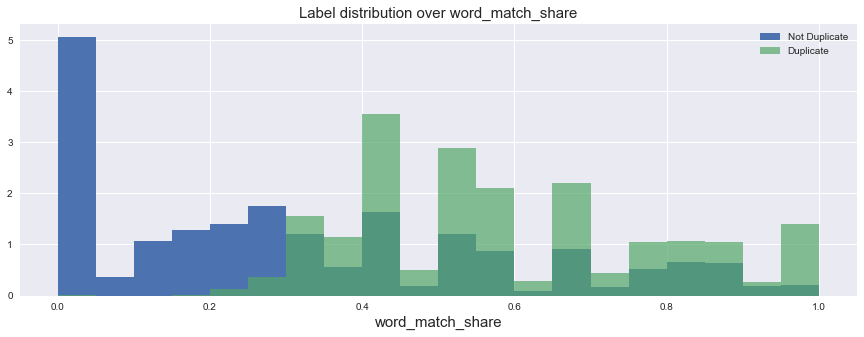

In [32]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['clean_q1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['clean_q2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
test_word_match=df_test.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

TF-idf



In [44]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [45]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 3.2121909069299805e-06), ('what', 3.866049129752341e-06), ('is', 4.44150318233703e-06), ('how', 5.393045129001639e-06), ('i', 5.531187601289873e-06), ('a', 5.612050194176937e-06), ('to', 5.7600368642359315e-06), ('in', 6.0342746801834415e-06), ('of', 7.275796335908965e-06), ('do', 7.465750867893539e-06)]

Least common words and weights: 


[('fulham', 9.998000399920016e-05),
 ('supercard?', 9.998000399920016e-05),
 ('ue4', 9.998000399920016e-05),
 ('wieght', 9.998000399920016e-05),
 ('exaggerate', 9.998000399920016e-05),
 ('mirrorplacement', 9.998000399920016e-05),
 ('michelson"', 9.998000399920016e-05),
 ('pentatonix', 9.998000399920016e-05),
 ('hydrant', 9.998000399920016e-05),
 ('appreciated"', 9.998000399920016e-05)]

In [46]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['clean_q1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['clean_q2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

/Users/jingyi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


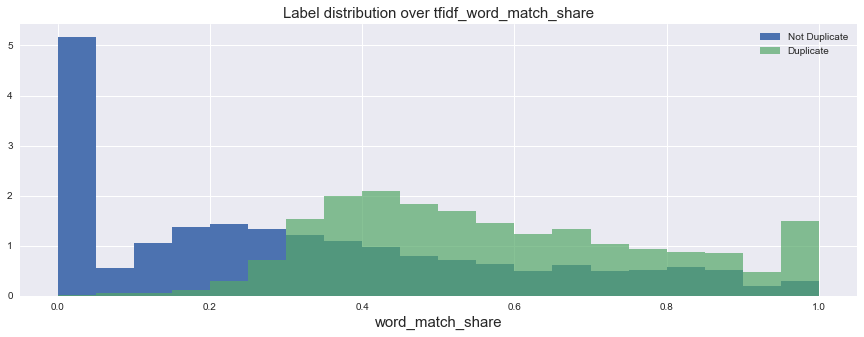

In [47]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [21]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.780553200628
   TFIDF AUC: 0.770564857091


In [93]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values
y_test=df_test['is_duplicate'].values

/Users/jingyi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/jingyi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [89]:
x_train.head()

,tfidf_word_match
0,0.449822
1,0.696404
2,1.000000
3,0.049263
4,0.000000


In [90]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
print(scale)
while scale > 1:
    
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

1.2373116507277628
0.1912475612920587


In [24]:
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

/Users/jingyi/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBOOST


In [86]:
x_train.head()

,word_match,tfidf_word_match
0,0.461538,0.449822
1,0.666667,0.696404
2,1.000000,1.000000
3,0.222222,0.049263
4,0.000000,0.000000


In [94]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
#params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 2000, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.686104	valid-logloss:0.68608
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.628677	valid-logloss:0.628422
[20]	train-logloss:0.588073	valid-logloss:0.587681
[30]	train-logloss:0.558349	valid-logloss:0.557851
[40]	train-logloss:0.536128	valid-logloss:0.535576
[50]	train-logloss:0.519217	valid-logloss:0.518628
[60]	train-logloss:0.506157	valid-logloss:0.505546
[70]	train-logloss:0.496014	valid-logloss:0.495393
[80]	train-logloss:0.488158	valid-logloss:0.487526
[90]	train-logloss:0.481902	valid-logloss:0.481284
[100]	train-logloss:0.476877	valid-logloss:0.476274
[110]	train-logloss:0.47289	valid-logloss:0.472272
[120]	train-logloss:0.469737	valid-logloss:0.469119
[130]	train-logloss:0.467225	valid-logloss:0.466608
[140]	train-logloss:0.465196	valid-logloss:0.464594
[150]	train-logloss:0.463575	valid-logloss:0.462999
[160]	train-logloss:0.462231	v

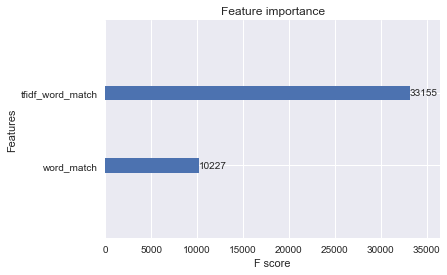

In [84]:

xgb.plot_importance(bst)



In [ ]:
df_train.head()